<a href="https://colab.research.google.com/github/jojoayan1992/ML_CyberSec/blob/master/Project1/Project_1_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML in Cybersecurity: Project I

## Team
  * **Team name**:  *fill this in*
  * **Members**:  *fill this in. format: name1 (email1), name2 (email2), ...*
  * **Tutor**: *fill this in after being assigned*


## Logistics
  * **Due date**: 11th November 2018, 23:59:59 (to email the completed notebook to your respective tutors)
  * Complete this in **teams of 3**
  * Write to Hossein (hossein.hajipour@cispa.saarland) by **2nd November** your team members and team-name. 
  * In case you cannot find a team, some available options: (a) Contact Hossein, who can help you out (b) Post on the [course group](https://groups.google.com/d/forum/ml-cysec-2018)
  * Each team will be assigned a tutor. Mail the notebook (or share the collab link) to the respective TAs before the due date.
  
  
## Timeline
  * 29-Oct-2018: Project 1 hand-out
  * 2-Nov-2018: Write to Hossein your team-name and members
  * 5-Nov-2018: Each team is assigned a tutor
  * **11-Nov-2018** (23:59:59): Email completed notebook to respective TAs
  * **12-Nov-2018** (12:15-14:00, regular tutorial slot): Teams present their projects
  * 19-Nov-2018 (12:15-14:00, regular tutorial slot): Project 1 discussion and summary
  
  
## About this Project
In this project, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 24 in the [second](https://cms.cispa.saarland/mlcysec/dl/2/2018-10-24_ML_overview.pdf) lecture. Within this framework, the following blocks of this project are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this project will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
 
We will evaluate this criteria in a **12-minute presentation** (9 mins for presentation + 3 mins for Q&A). This will be during the regular tutorial slot on 12th November 12:00-14:00 (Location will be conveyed soon). In case you have time restrictions during the time of the tutorial, notify us asap!  You can present on your laptops.

The most interesting findings will be discussed in the tutorial slot on 19th November.
 
 A note on (1.): 
  * choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!
 
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [0]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [2]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.

# In case you want to use neural networks, we only support sklearn and keras (With a tensorflow backend).

import sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection
import sklearn.metrics
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow as tf
from keras.datasets import mnist

Using TensorFlow backend.


Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [0]:
def identity_func(foo):
    return foo


#
#
# ------- Your Code -------
#
#

# 1. Loading and Visualizing data

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`keras.datasets`](https://keras.io/datasets/#mnist-database-of-handwritten-digits).
  
  
  In either case, it is important that you have disjoint trainval and test splits!

In [3]:
(x_trainval, y_trainval), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
#
#
# ------- Your Code -------
#
#

print('x_trainval.shape = {},  y_trainval.shape = {}'.format(x_trainval.shape, y_trainval.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

#
# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 0.1
# Resample x_[], y_[]
x = np.concatenate((x_trainval, x_test))
#print(x.shape)
y = np.concatenate((y_trainval, y_test))
#print(y.shape)
sss = StratifiedShuffleSplit(n_splits=1, test_size=int(DEBUG_FRAC * x_test.shape[0]), train_size=int(DEBUG_FRAC * x_trainval.shape[0]), random_state=42)
idx = sss.split(x,y)
for train_idx, test_idx in idx:
    x_trainval, y_trainval = x[train_idx], y[train_idx]
    x_test, y_test = x[test_idx], y[test_idx]

print(x_trainval.shape, x_test.shape)

x_trainval.shape = (60000, 28, 28),  y_trainval.shape = (60000,)
x_test.shape = (10000, 28, 28),  y_test.shape = (10000,)
(6000, 28, 28) (1000, 28, 28)


## 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 7, [Lecture 2](https://cms.cispa.saarland/mlcysec/dl/2/2018-10-24_ML_overview.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

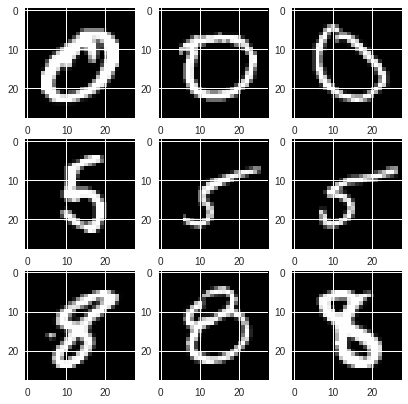

In [5]:
#
#
# ------- Your Code -------
%matplotlib inline
fig, axes = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01, top=1.3, right=1)
nums = [0, 5, 8]
for i in range(len(nums)):
    sample_idxs = (y_trainval == nums[i])
    sample_X = x_trainval[sample_idxs][:3]
    for s_num in range(len(sample_X)):
        axes[i, s_num].imshow(sample_X[s_num], cmap='gray')
#
#
#plt.imshow(x_train[0], cmap='gray')
#plt.savefig('fig1.pdf')   # Save the figures in case you want to use it in the presentation
#plt.show()   # These should be some visualization of data at the end of this section

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.1: Model [M1]: *fill-this-in*

**Short description **: *fill this in*

### 2.1.1: Hyper-parameters

Define hyper-parameters for your method here

In [6]:
#
#
# ------- Your Code -------
#
#

#gamma = 0.001 # example
num_neighbors = np.arange(1, 11)
weights = ["uniform", "distance"]
#norm = np.arange(1, 6)
param_space = {"n_neighbors": num_neighbors, "weights": weights}
print(x_trainval.shape)
#x_trainval_knn = x_trainval.reshape(x_trainval.shape[0],-1)
x_trainval_knn = x_trainval.reshape(x_trainval.shape[0],-1)
print(x_trainval_knn.shape)
y_trainval_knn = y_trainval
x_test_knn = x_test.reshape(x_test.shape[0],-1)
y_test_knn = y_test

test_set = 'val'  #  or 'test'
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation
if test_set == 'val':
    train_idxs, val_idxs = ..., ...   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

(6000, 28, 28)
(6000, 784)


### 2.1.2: Model

Define your model here (all hyper-parameters in 2.1.1)

In [0]:
#
#
# ------- Your Code -------
#
#
knn = KNeighborsClassifier()
#train_scores, test_scores = sklearn.model_selection.validation_curve(
#    knn, x_trainval_knn, y_trainval_knn, param_name="n_neighbors", param_range=num_neighbors,
#    cv=5, scoring="accuracy", n_jobs=1)
grid_search = sklearn.model_selection.GridSearchCV(knn, param_space, verbose=2, n_jobs=-1, cv=3, refit=True, return_train_score=True, scoring="accuracy")


In [10]:
grid_search.fit(x_trainval_knn, y_trainval_knn)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=  24.4s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=  24.3s
[CV] n_neighbors=1, weights=distance .................................
[CV] ................... n_neighbors=1, weights=uniform, total=  24.7s
[CV] n_neighbors=1, weights=distance .................................
[CV] .................. n_neighbors=1, weights=distance, total=  24.9s
[CV] n_neighbors=1, weights=distance .................................
[CV] .................. n_neighbors=1, weights=distance, total=  24.7s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] .................. n_neighbors=1, weights=distance, total=  24.7s
[CV] n_neighbors

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 22.2min


[CV] ................... n_neighbors=7, weights=uniform, total=  24.3s
[CV] n_neighbors=7, weights=distance .................................
[CV] ................... n_neighbors=7, weights=uniform, total=  25.2s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=  25.1s
[CV] n_neighbors=7, weights=distance .................................
[CV] .................. n_neighbors=7, weights=distance, total=  25.2s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] .................. n_neighbors=7, weights=distance, total=  25.3s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] ................... n_neighbors=8, weights=uniform, total=  25.1s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] ................... n_neighbors=8, weights=uniform, total=  25.0s
[CV] n_neighbors=8, weights=distance .................................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 36.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [0]:
print(grid_search.cv_results_['params'][grid_search.best_index_])
y_pred = grid_search.predict(x_test_knn)

print(sklearn.metrics.accuracy_score(y_test_knn, y_pred))

In [0]:
print(grid_search.cv_results_)

In [0]:
list_ids_distance = []
for i, x in enumerate(grid_search.cv_results_['params']):
    if x['weights'] == 'distance':
        list_ids_distance.append(i) 
    
list_ids_uniform = []
for i, x in enumerate(grid_search.cv_results_['params']):
    if x['weights'] == 'uniform':
        list_ids_uniform.append(i) 



In [0]:
#train_scores_mean = grid_search.cv_results_['mean_train_score'][list_ids]
#train_scores_std = grid_search.cv_results_['std_train_score'][list_ids]
test_scores_dist_mean = grid_search.cv_results_['mean_test_score'][list_ids_distance]
test_scores_dist_std = grid_search.cv_results_['std_test_score'][list_ids_distance]
test_scores_unif_mean = grid_search.cv_results_['mean_test_score'][list_ids_uniform]
test_scores_unif_std = grid_search.cv_results_['std_test_score'][list_ids_uniform]

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors (k)")
plt.ylabel("Score")
plt.xticks(num_neighbors)

plt.plot(num_neighbors, test_scores_dist_mean, label="Cross-Validation score distance weighting",
             color="darkorange")
plt.fill_between(num_neighbors, test_scores_dist_mean - test_scores_dist_std,
                 test_scores_dist_mean + test_scores_dist_std, alpha=0.2,
                 color="darkorange")
plt.plot(num_neighbors, test_scores_unif_mean, label="Cross-validation score uniform weighting",
             color="navy")
plt.fill_between(num_neighbors, test_scores_unif_mean - test_scores_unif_std,
                 test_scores_unif_mean + test_scores_unif_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

In [0]:
knn_10 = KNeighborsClassifier(n_neighbors=4, weights="distance")

### 2.1.3: Fit Model

Define optimization procedure and fit your model to the data

In [0]:
knn_10.fit(x_trainval_knn, y_trainval_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [0]:
y_pred = knn_10.predict(x_trainval_knn)

In [0]:
sklearn.metrics.accuracy_score(y_trainval_knn, y_pred)

1.0

### 2.1.4: Evaluation

Evaluate your model.

When possible, you should have:
  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

In [0]:
#
#
# ------- Your Code -------
#
#

### 2.1.5: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 * What were other design choices you faced?
 * Any other interesting insights...

# 2.2: Model [M2]: *fill-this-in*

*use the same format as above. Repeat Sections 2.1.1 -- 2.1.5*

# 2.3: Model [M3]: *fill-this-in*

*use the same format as above. Repeat Sections 2.1.1 -- 2.1.5*

# 3. Summary

Enter your final summary here.

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.

Which model do you recommend to perform digit classification and why?

Feel free to discuss other insightful observations.